# Load Data

In [2]:
from statistics import mean 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings; warnings.simplefilter('ignore')


In [5]:
from statsmodels.tsa.stattools import kpss

In [6]:
import re

In [7]:
import pandas as pd

In [8]:
import statsmodels.tsa.stattools as ts

In [9]:
df = pd.read_csv('preprocessed.csv')

In [10]:
df.head()

,Unnamed: 0,Name,Link,Date,Gender,Age,Lead Follow,Membership,Climb Type,Best Times,...,Trad Leads,Trad Follows,Mixed Leads,Mixed Follows,Aid Leads,Aid Follows,Ice Leads,Ice Follows,Boulder,month_year
0,0,Aidan Shelburne,https://www.mountainproject.com/user/200717675...,2021-03-08,Male,21.0,"Sport: leads 5.11a, follows 5.11d\nBoulders: V7",2020,"Sport, TR, Gym",Weekday afternoons/Weekends,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V7,2021-03
1,1,Aidan Shelburne,https://www.mountainproject.com/user/200717675...,2021-03-06,Male,21.0,"Sport: leads 5.11a, follows 5.11d\nBoulders: V7",2020,"Sport, TR, Gym",Weekday afternoons/Weekends,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V7,2021-03
2,2,Aidan Shelburne,https://www.mountainproject.com/user/200717675...,2021-03-06,Male,21.0,"Sport: leads 5.11a, follows 5.11d\nBoulders: V7",2020,"Sport, TR, Gym",Weekday afternoons/Weekends,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V7,2021-03
3,3,Aidan Shelburne,https://www.mountainproject.com/user/200717675...,2021-03-06,Male,21.0,"Sport: leads 5.11a, follows 5.11d\nBoulders: V7",2020,"Sport, TR, Gym",Weekday afternoons/Weekends,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V7,2021-03
4,4,Aidan Shelburne,https://www.mountainproject.com/user/200717675...,2021-01-16,Male,21.0,"Sport: leads 5.11a, follows 5.11d\nBoulders: V7",2020,"Sport, TR, Gym",Weekday afternoons/Weekends,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V7,2021-01


In [11]:
df.shape

(514921, 33)

In [12]:
len(df.Name.unique())

3960

# Gender Distribution

In [13]:
df.Gender.value_counts()

Male           436021
Female          77710
Unknown          1135
Genderqueer        55
Name: Gender, dtype: int64

Males:  3206
Females:  731


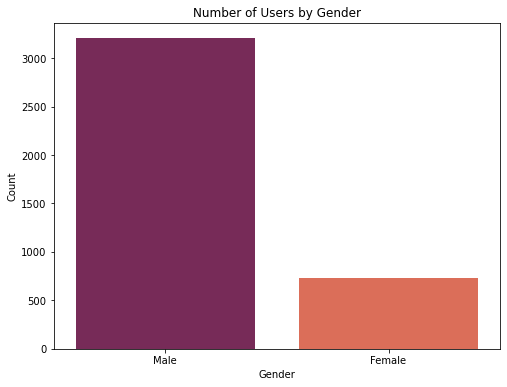

In [28]:
male_users = len(df[df.Gender == 'Male'].Name.unique())
female_users = len(df[df.Gender == 'Female'].Name.unique())
print('Males: ', male_users)
print('Females: ', female_users)

x = ['Male', 'Female']
y = [male_users,female_users]

plt.figure(figsize=(8,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Users by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Age Distribution

In [163]:
print('Null values: ', df['Age'].isnull().sum())

Null values:  829


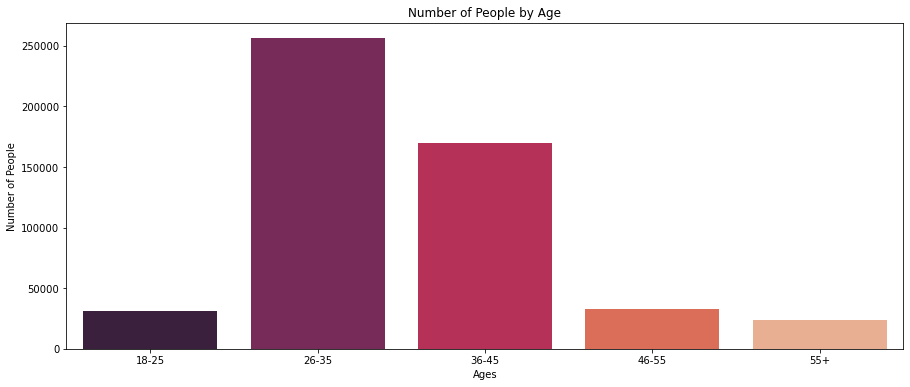

In [164]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of People by Age")
plt.xlabel("Ages")
plt.ylabel("Number of People")
plt.show()

In [16]:
df.Age

0         21.0
1         21.0
2         21.0
3         21.0
4         21.0
          ... 
514916    65.0
514917    65.0
514918    65.0
514919    65.0
514920    65.0
Name: Age, Length: 514921, dtype: float64

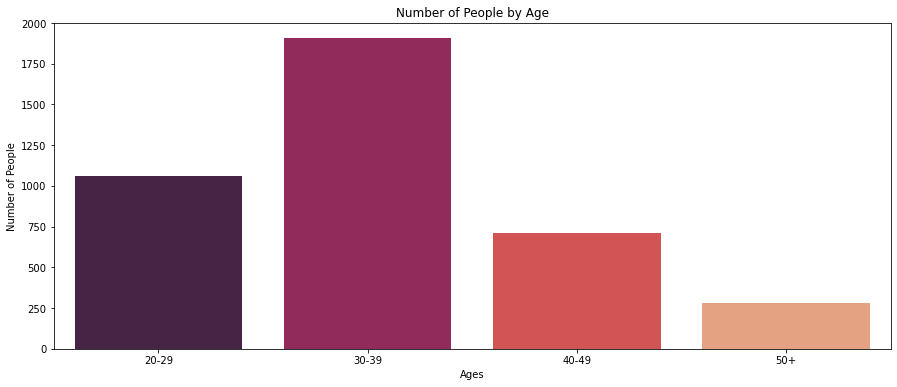

In [30]:
age20s = len(df[(df.Age <= 29) & (df.Age >= 20)].Name.unique())
age30s = len(df[(df.Age <= 39) & (df.Age >= 30)].Name.unique())
age40s = len(df[(df.Age <= 49) & (df.Age >= 40)].Name.unique())
age50 = len(df[df.Age >= 50].Name.unique())

x = ["20-29","30-39","40-49","50+"]
y = [age20s,age30s,age40s,age50]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of People by Age")
plt.xlabel("Ages")
plt.ylabel("Number of People")
plt.show()

# Add month column

In [165]:
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')

In [166]:
df['Month'] = df.Date.dt.month

# Only Sport Climbs

In [167]:
df_sport = df[df['Route Type'] == 'Sport']

In [168]:
df_sport.shape

(224163, 34)

In [169]:
df_sport.columns

Index(['Unnamed: 0', 'Name', 'Link', 'Date', 'Gender', 'Age', 'Lead Follow',
       'Membership', 'Climb Type', 'Best Times', 'Other Interests', 'Rating',
       'Route Type', 'Style', 'Lead Style', 'URL', 'Pitches', 'Location',
       'Avg Stars', 'Your Stars', 'Your Rating', 'Sport Leads',
       'Sport Follows', 'Trad Leads', 'Trad Follows', 'Mixed Leads',
       'Mixed Follows', 'Aid Leads', 'Aid Follows', 'Ice Leads', 'Ice Follows',
       'Boulder', 'month_year', 'Month'],
      dtype='object')

In [170]:
df_sport = df_sport[['Name', 'Date', 'Month', 'month_year', 'Gender', 'Age', 'Rating', 'Style', 'Lead Style', 'Pitches', 'Sport Leads', 'Sport Follows']]

In [171]:
df_sport.head()

,Name,Date,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,Sport Leads,Sport Follows
36,Aidan Shelburne,2020-12-19,12,2020-12,Male,21.0,5.11b,TR,NaN,1.0,5.11a,5.11d
120,Aidan Shelburne,2020-08-06,8,2020-08,Male,21.0,5.11a,Lead,Onsight,1.0,5.11a,5.11d
121,Aidan Shelburne,2020-08-06,8,2020-08,Male,21.0,5.10a,Lead,NaN,1.0,5.11a,5.11d
122,Aidan Shelburne,2020-08-06,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,5.11a,5.11d
123,Aidan Shelburne,2020-08-06,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,5.11a,5.11d


## Make Date the Index

In [172]:
df_sport.set_index('Date', inplace=True)

In [173]:
df_sport.head()

,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,Sport Leads,Sport Follows
Date,,,,,,,,,,,
2020-12-19,Aidan Shelburne,12,2020-12,Male,21.0,5.11b,TR,NaN,1.0,5.11a,5.11d
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.11a,Lead,Onsight,1.0,5.11a,5.11d
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10a,Lead,NaN,1.0,5.11a,5.11d
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,5.11a,5.11d
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,5.11a,5.11d


## Turn Sport Rating into Numerical Formal

In [174]:
df_sport['Rating'].unique()

array(['5.11b', '5.11a', '5.10a', '5.10', '5.10b', '5.9', '5.9+',
       '5.11b/c', '5.13c', '5.12c/d', '5.11c/d', '5.12a', '5.10a/b',
       '5.13a', '5.12c', '5.11c', '5.12d', '5.10d', '5.12b', '5.10c',
       '5.11d', '5.11-', '5.12b/c', '5.11+', '5.8', '5.11a/b', '5.11',
       '5.7+', '5.10b/c', '5.7', '5.12a/b', '5.12c PG13', '5.3', '5.9-',
       '5.10-', '5.5', '5.2', '5.10c/d', '5.4', '5.13+ R', '5.12-',
       '5.13b', '5.6', '5.8+', '5.10+', '5.4 PG13', '5.8-', '5.10a PG13',
       '5.12', '5.10c R', '5.10 PG13', '5.10d PG13', '5.11a PG13',
       '5.7 R', '5.7+ PG13', '5.8 PG13', '5.9- PG13', '5.8+ PG13',
       '5.13-', '5.10b PG13', '5.9+ PG13', '4th', '5.7 PG13', '5.6 R',
       '5.13', '5.14a', '5.13a/b', '5.12+', '5.9 PG13', '5.10c PG13',
       '5.10- PG13', '5.10b/c R', '5.6 PG13', '5.8 R', '5.10b R',
       '5.10b/c PG13', '5.13d', '5.13b/c', '5.9 R', '5.9+ R', '5.10d R',
       '5.8+ R', '5.11a R', '5.11c R', '5.11a/b PG13', '5.10a R',
       '5.12b PG13', '5.11b P

In [175]:
def numerical_difficulty(row):
    """
    Integer to represent general climbing difficulty.
    """
    if type(row) == str:
        grade = row
    if (re.search('5.15d', grade)):
        difficulty = 33
    elif (re.search('5.15c', grade)):
        difficulty = 32      
    elif (re.search('5.15b', grade)):
        difficulty = 31
    elif (re.search('5.15a', grade)):
        difficulty = 30
    elif (re.search('5.15\\+', grade)):
        difficulty = 32.5
    elif (re.search('5.15\\-', grade)):
        difficulty = 30.5
    elif (re.search('5.15', grade)):
        difficulty = 31.5 
          
    elif (re.search('5.14d', grade)):
        difficulty = 29
    elif (re.search('5.14c', grade)):
        difficulty = 28
    elif (re.search('5.14b', grade)):
        difficulty = 27
    elif (re.search('5.14a', grade)):
        difficulty = 26
    elif (re.search('5.14\\+', grade)):
        difficulty = 28.5  
    elif (re.search('5.14\\-', grade)):
        difficulty = 26.5 
    elif (re.search('5.14', grade)):
        difficulty = 27.5 
          
    elif (re.search('5.13d', grade)):
        difficulty = 25
    elif (re.search('5.13c', grade)):
        difficulty = 24
    elif (re.search('5.13b', grade)):
        difficulty = 23
    elif (re.search('5.13a', grade)):
        difficulty = 22
    elif (re.search('5.13\\+', grade)):
        difficulty = 24.5  
    elif (re.search('5.13\\-', grade)):
        difficulty = 22.5  
    elif (re.search('5.13', grade)):
        difficulty = 23.5
          
    elif (re.search('5.12d', grade)):
        difficulty = 21
    elif (re.search('5.12c', grade)):
        difficulty = 20
    elif (re.search('5.12b', grade)):
        difficulty = 19
    elif (re.search('5.12a', grade)):
        difficulty = 18
    elif (re.search('5.12\\+', grade)):
        difficulty = 20.5
    elif (re.search('5.12\\-', grade)):
        difficulty = 18.5
    elif (re.search('5.12', grade)):
        difficulty =  19.5
          
    elif (re.search('5.11d', grade)):
        difficulty = 17
    elif (re.search('5.11c', grade)):
        difficulty = 16
    elif (re.search('5.11b', grade)):
        difficulty = 15
    elif (re.search('5.11a', grade)):
        difficulty = 14
    elif (re.search('5.11\\+', grade)):
        difficulty = 16.5
    elif (re.search('5.11\\-', grade)):
        difficulty = 14.5
    elif (re.search('5.11', grade)):
        difficulty =  15.5

    elif (re.search('5.10d', grade)):
        difficulty = 13
    elif (re.search('5.10c', grade)):
        difficulty = 12
    elif (re.search('5.10b', grade)):
        difficulty = 11
    elif (re.search('5.10a', grade)):
        difficulty = 10
    elif (re.search('5.10\\-', grade)):
        difficulty = 10.5 
    elif (re.search('5.10\\+', grade)):
        difficulty = 12.5 
    elif (re.search('5.10', grade)):
        difficulty =  11.5

          
    elif (re.search('5.9', grade)):
        difficulty = 9 
    elif (re.search('5.8', grade)):
        difficulty = 8           
    elif (re.search('5.7', grade)):
        difficulty = 7           
    elif (re.search('5.6', grade)):
        difficulty = 6    
    elif (re.search('5.5', grade)):
        difficulty = 5           
    elif (re.search('5.4', grade)):
        difficulty = 4         
    elif (re.search('5.3', grade)):
        difficulty = 3           
    elif (re.search('5.2', grade)):
        difficulty = 2           
    elif (re.search('5.1', grade)):
        difficulty = 1           
    elif (re.search('5.0', grade)):
        difficulty = .8          
    elif (re.search('5th', grade)):
        difficulty = .6          
    elif (re.search('4th', grade)):
        difficulty = .4           
    elif (re.search('3rd', grade)):
        difficulty = .2 
    else: 
          difficulty = 'Unknown'
    return difficulty

df_sport['numerical_difficulty'] = df_sport.Rating.apply(lambda row: numerical_difficulty(row))

In [176]:
# Sanity check
df_sport[['Rating', 'numerical_difficulty']].sample(5)

,Rating,numerical_difficulty
Date,,
2021-01-21,5.11a,14.0
2014-08-18,5.10d,13.0
2019-05-16,5.7,7.0
2013-07-24,5.10a,10.0
2019-12-21,5.10a,10.0


## Add max grade of the month to a new column

In [177]:
# Add a new column that shows the maximum grade climbed that month
df_sport['max_month'] = df_sport.groupby(['Name', 'month_year']).numerical_difficulty.transform('max')


In [178]:
df_sport.head()

,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,Sport Leads,Sport Follows,numerical_difficulty,max_month
Date,,,,,,,,,,,,,
2020-12-19,Aidan Shelburne,12,2020-12,Male,21.0,5.11b,TR,NaN,1.0,5.11a,5.11d,15.0,15.0
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.11a,Lead,Onsight,1.0,5.11a,5.11d,14.0,14.0
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10a,Lead,NaN,1.0,5.11a,5.11d,10.0,14.0
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,5.11a,5.11d,11.5,14.0
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,5.11a,5.11d,11.5,14.0


## Add max lead send grade per month

In [180]:
df_sport['Lead Style'].unique()

array([nan, 'Onsight', 'Redpoint', 'Fell/Hung', 'Flash', 'Pinkpoint'],
      dtype=object)

In [181]:
df_sport_lead_send = df_sport[(df_sport['Lead Style'] == 'Onsight') | 
                         (df_sport['Lead Style'] == 'Redpoint') | 
                         (df_sport['Lead Style'] == 'Flash') |
                         (df_sport['Lead Style'] == 'Pinkpoint')]

In [182]:
df_sport_lead_send.head()

,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,Sport Leads,Sport Follows,numerical_difficulty,max_month
Date,,,,,,,,,,,,,
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.11a,Lead,Onsight,1.0,5.11a,5.11d,14.0,14.0
2020-07-16,Aidan Shelburne,7,2020-07,Male,21.0,5.10b,Lead,Onsight,1.0,5.11a,5.11d,11.0,11.0
2020-07-16,Aidan Shelburne,7,2020-07,Male,21.0,5.10a,Lead,Onsight,1.0,5.11a,5.11d,10.0,11.0
2019-10-19,Aidan Shelburne,10,2019-10,Male,21.0,5.11a,Lead,Redpoint,1.0,5.11a,5.11d,14.0,15.0
2021-03-07,Alex Holmann,3,2021-03,Male,21.0,5.11a,Lead,Flash,1.0,5.12c,3rd,14.0,24.0


In [183]:
# Add a new column that shows the maximum grade climbed that month
df_sport_lead_send['max_lead_send_month'] = df_sport_lead_send.groupby(['Name', 'month_year']).numerical_difficulty.transform('max')


In [184]:
df_sport_lead_send.head()

,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,Sport Leads,Sport Follows,numerical_difficulty,max_month,max_lead_send_month
Date,,,,,,,,,,,,,,
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.11a,Lead,Onsight,1.0,5.11a,5.11d,14.0,14.0,14.0
2020-07-16,Aidan Shelburne,7,2020-07,Male,21.0,5.10b,Lead,Onsight,1.0,5.11a,5.11d,11.0,11.0,11.0
2020-07-16,Aidan Shelburne,7,2020-07,Male,21.0,5.10a,Lead,Onsight,1.0,5.11a,5.11d,10.0,11.0,11.0
2019-10-19,Aidan Shelburne,10,2019-10,Male,21.0,5.11a,Lead,Redpoint,1.0,5.11a,5.11d,14.0,15.0,14.0
2021-03-07,Alex Holmann,3,2021-03,Male,21.0,5.11a,Lead,Flash,1.0,5.12c,3rd,14.0,24.0,14.0


In [185]:
# Comparing how many rows each of these dfs have
df_sport_lead_send.shape

(74273, 14)

In [186]:
df_sport.shape

(224163, 13)

In [187]:
df.shape

(514921, 34)

In [188]:
len(df.Name.unique())

3960

## Add average grade of the month to a new column

In [189]:
# Add a new column that shows the average grade climbed that month
df_sport['avg_month'] = df_sport.groupby(['Name', 'month_year']).numerical_difficulty.transform('mean')

In [190]:
df_sport.head(20)

,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,Sport Leads,Sport Follows,numerical_difficulty,max_month,avg_month
Date,,,,,,,,,,,,,,
2020-12-19,Aidan Shelburne,12,2020-12,Male,21.0,5.11b,TR,NaN,1.0,5.11a,5.11d,15.0,15.0,15.000000
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.11a,Lead,Onsight,1.0,5.11a,5.11d,14.0,14.0,11.750000
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10a,Lead,NaN,1.0,5.11a,5.11d,10.0,14.0,11.750000
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,5.11a,5.11d,11.5,14.0,11.750000
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,5.11a,5.11d,11.5,14.0,11.750000
2020-07-16,Aidan Shelburne,7,2020-07,Male,21.0,5.10b,Lead,Onsight,1.0,5.11a,5.11d,11.0,11.0,9.750000
2020-07-16,Aidan Shelburne,7,2020-07,Male,21.0,5.9,Lead,NaN,1.0,5.11a,5.11d,9.0,11.0,9.750000
2020-07-16,Aidan Shelburne,7,2020-07,Male,21.0,5.9+,Lead,NaN,1.0,5.11a,5.11d,9.0,11.0,9.750000
2020-07-16,Aidan Shelburne,7,2020-07,Male,21.0,5.10a,Lead,Onsight,1.0,5.11a,5.11d,10.0,11.0,9.750000


## Add number of sport ticks this month

In [191]:
# Add a new column that shows the number of ticks climbed that month
df_sport['sport_ticks_this_month'] = df_sport.groupby(['Name', 'month_year']).month_year.transform('count')

In [192]:
df_sport.head(15)

,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,Sport Leads,Sport Follows,numerical_difficulty,max_month,avg_month,sport_ticks_this_month
Date,,,,,,,,,,,,,,,
2020-12-19,Aidan Shelburne,12,2020-12,Male,21.0,5.11b,TR,NaN,1.0,5.11a,5.11d,15.0,15.0,15.000000,1
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.11a,Lead,Onsight,1.0,5.11a,5.11d,14.0,14.0,11.750000,4
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10a,Lead,NaN,1.0,5.11a,5.11d,10.0,14.0,11.750000,4
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,5.11a,5.11d,11.5,14.0,11.750000,4
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,5.11a,5.11d,11.5,14.0,11.750000,4
2020-07-16,Aidan Shelburne,7,2020-07,Male,21.0,5.10b,Lead,Onsight,1.0,5.11a,5.11d,11.0,11.0,9.750000,4
2020-07-16,Aidan Shelburne,7,2020-07,Male,21.0,5.9,Lead,NaN,1.0,5.11a,5.11d,9.0,11.0,9.750000,4
2020-07-16,Aidan Shelburne,7,2020-07,Male,21.0,5.9+,Lead,NaN,1.0,5.11a,5.11d,9.0,11.0,9.750000,4
2020-07-16,Aidan Shelburne,7,2020-07,Male,21.0,5.10a,Lead,Onsight,1.0,5.11a,5.11d,10.0,11.0,9.750000,4


## Describe

In [193]:
df_sport.describe()

,Month,Age,Pitches,numerical_difficulty,max_month,avg_month,sport_ticks_this_month
count,224163.000000,224124.000000,224162.000000,224163.000000,224163.000000,224163.000000,224163.000000
mean,6.791754,35.781143,1.142509,11.463690,15.011732,11.463690,15.313343
std,3.026425,8.635800,0.887125,3.652915,3.834586,2.821321,22.177394
min,1.000000,20.000000,1.000000,0.400000,0.800000,0.800000,1.000000
25%,5.000000,30.000000,1.000000,9.000000,12.000000,9.400000,5.000000
50%,7.000000,34.000000,1.000000,10.500000,15.000000,11.000000,10.000000
75%,9.000000,40.000000,1.000000,14.000000,18.000000,13.166667,18.000000
max,12.000000,71.000000,27.000000,27.000000,27.000000,27.000000,356.000000


## Save as CSV

In [194]:
df_sport.head()

,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,Sport Leads,Sport Follows,numerical_difficulty,max_month,avg_month,sport_ticks_this_month
Date,,,,,,,,,,,,,,,
2020-12-19,Aidan Shelburne,12,2020-12,Male,21.0,5.11b,TR,NaN,1.0,5.11a,5.11d,15.0,15.0,15.00,1
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.11a,Lead,Onsight,1.0,5.11a,5.11d,14.0,14.0,11.75,4
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10a,Lead,NaN,1.0,5.11a,5.11d,10.0,14.0,11.75,4
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,5.11a,5.11d,11.5,14.0,11.75,4
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,5.11a,5.11d,11.5,14.0,11.75,4


In [195]:
df_sport.dtypes

Name                       object
Month                       int64
month_year                 object
Gender                     object
Age                       float64
Rating                     object
Style                      object
Lead Style                 object
Pitches                   float64
Sport Leads                object
Sport Follows              object
numerical_difficulty      float64
max_month                 float64
avg_month                 float64
sport_ticks_this_month      int64
dtype: object

In [196]:
df_sport.to_csv('sport_preprocessed.csv')

## Pivot Tables

### Max grade by gender and season

In [41]:
# pivot table of max climb with rows=month and cols as male or female
pt = df_sport.pivot_table(index='Month', columns='Gender', values='max_month')
pt = pt.drop(columns=['Genderqueer', 'Unknown'])
pt

Gender,Female,Male
Month,,
1,15.013299,15.274806
2,14.142261,15.188139
3,13.975997,14.785958
4,13.912495,14.795627
5,14.263368,15.007452
6,14.359103,15.143709
7,15.116691,15.512114
8,14.514905,15.162499
9,14.224872,15.125420


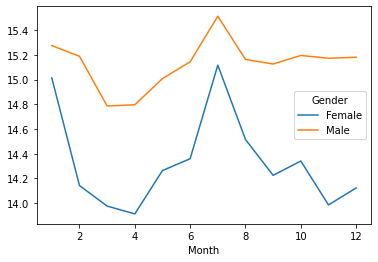

In [42]:
# plot max climb by month and gender
pt.plot();

The graph above shows a clear seasonality effect. People climb harder in January and July than other months.

### Average grade by gender and season

In [43]:
# pivot table of avg climb with rows=month and cols as male or female
pt = df_sport.pivot_table(index='Month', columns='Gender', values='avg_month')
pt = pt.drop(columns=['Genderqueer', 'Unknown'])
pt

Gender,Female,Male
Month,,
1,11.510266,11.791785
2,11.106069,11.552472
3,10.924561,11.352140
4,10.788469,11.397968
5,10.879622,11.391855
6,10.985278,11.452380
7,11.363776,11.667367
8,11.181165,11.593714
9,10.980769,11.476682


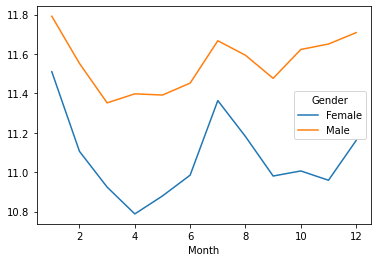

In [44]:
# plot max climb by month and gender
pt.plot();

### Number of ticks by gender and month

In [45]:
df_sport.head()

,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,numerical_difficulty,max_month,avg_month,sport_ticks_this_month
Date,,,,,,,,,,,,,
2020-12-19,Aidan Shelburne,12,2020-12,Male,21.0,5.11b,TR,NaN,1.0,15.0,15.0,15.00,1
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.11a,Lead,Onsight,1.0,14.0,14.0,11.75,4
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10a,Lead,NaN,1.0,10.0,14.0,11.75,4
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,11.5,14.0,11.75,4
2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,11.5,14.0,11.75,4


In [46]:
# pivot table of avg ticks with rows=month and cols as male or female
pt = df_sport.pivot_table(index='Month', columns='Gender', values='sport_ticks_this_month')
pt = pt.drop(columns=['Genderqueer', 'Unknown'])
pt

Gender,Female,Male
Month,,
1,15.236118,13.480497
2,11.873051,20.962063
3,12.499357,12.827496
4,12.213200,14.527939
5,13.814578,13.220342
6,16.016464,15.209190
7,15.911843,22.153143
8,12.433604,13.945489
9,14.615385,16.777354


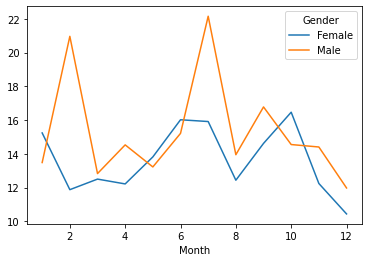

In [47]:
# plot ticks by month and gender
pt.plot();

Could this be because of some male outliers? By looking at the names of the people who have ticked over 50 climbs in a month, it doesn't look like it.

In [48]:
df_sport[df_sport.sport_ticks_this_month > 50].Name.unique()

array(['Mason Caiby', 'Brian Coventry', 'Nick Richter',
       'Krzysztof Danielewicz', 'Spencer B', 'Alex Landis',
       'Taylor "TBro" Brown', 'Sam Andree', 'Kim Anderson', 'Liet Keynes',
       'Jacob Sorum', 'Jorde', 'Alissa Doherty', 'Train4life',
       'Brian Stevens', 'dseltzer', 'Cara Hubbell', 'Angie M', 'Dane B',
       'Michael Day', 'Brian Carver', 'Julian Barnett', 'Derek Young',
       'Benjamn P', 'tim', 'Brett Boyd', 'cory b sargent',
       'Carl Schaefer', 'Bob R.', 'rob bauer', 'Greg Twombly',
       'Jonny Pizzaronni', 'davidhousky', 'Ivan Sokol', 'Bryan Nguyen',
       'Jonf', 'Steve Bachmeier', 'Dave Sharp', 'Austin Le',
       'Billy Barghahn', 'Nate Layton', 'Psaaat!', 'Cassidy Thomas',
       'Rachel Fuys', 'James Simmons', 'Mike W.', 'Casey Jensen',
       'C Hopwood', 'Arthur', 'Sev S', 'Brent Huff', 'Landon McBrayer',
       'Ken H', 'Jason Albino', 'Sir Camsalot', 'Sean M', 'Andrew Walker',
       'Louie', 'Dustin Searer', 'Remy Franklin', 'Chaaarles Futo

In [49]:
df_sport[df_sport.sport_ticks_this_month > 200].Name.unique()

array(['Brett Boyd', 'Bob R.', 'Dustin Searer'], dtype=object)

What if I just remove these three users?

In [50]:
df_sport_noOutliers = df_sport[df_sport != 'Brett Boyd']
df_sport_noOutliers = df_sport_noOutliers[df_sport != 'Bob R.']
df_sport_noOutliers = df_sport_noOutliers[df_sport != 'Dustin Searer']

In [51]:
# pivot table of avg ticks with rows=month and cols as male or female
pt = df_sport_noOutliers.pivot_table(index='Month', columns='Gender', values='sport_ticks_this_month')
pt = pt.drop(columns=['Genderqueer', 'Unknown'])
pt

Gender,Female,Male
Month,,
1,15.236118,13.480497
2,11.873051,20.962063
3,12.499357,12.827496
4,12.213200,14.527939
5,13.814578,13.220342
6,16.016464,15.209190
7,15.911843,22.153143
8,12.433604,13.945489
9,14.615385,16.777354


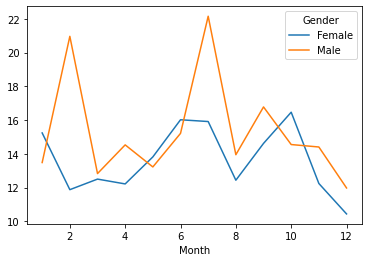

In [52]:
# plot ticks by month and gender
pt.plot();

Not much of a difference. I guess men just climb a lot more in February and July than women.

### Ticks over time

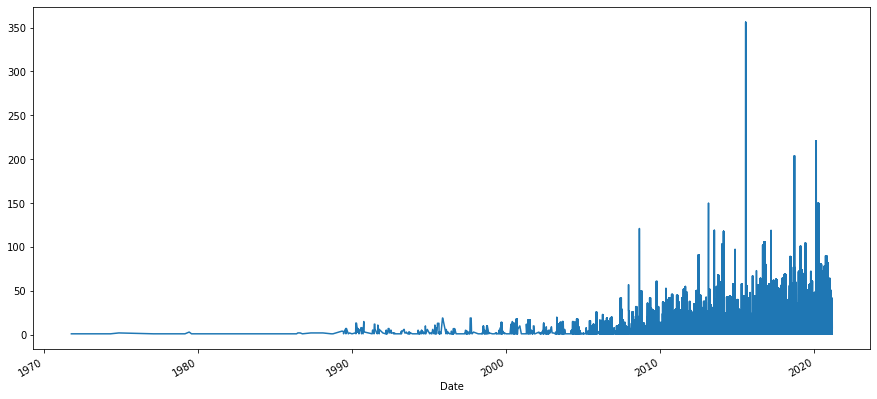

In [53]:
# plot store 1 sales when open
df_sport.sport_ticks_this_month.plot(figsize=(15,7));

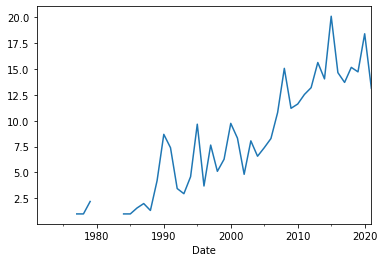

In [54]:
# Another way of visualizing ticks per year
sport_ticks = df_sport.sport_ticks_this_month
annual_ticks = sport_ticks.resample('A').mean()
annual_ticks.plot();

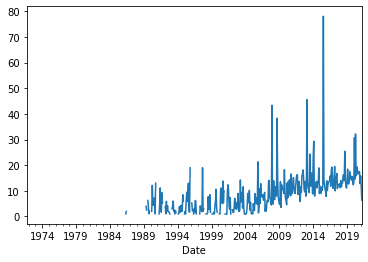

In [55]:
monthly_ticks = sport_ticks.resample('M').mean()
monthly_ticks.plot();

That spike in 2015 coincides with the same year Mountain Project was bought by REI.

### Max grades over time

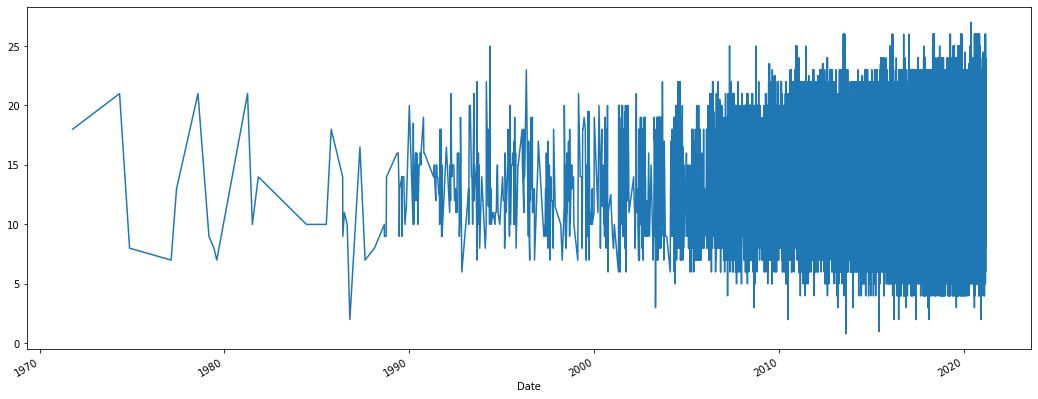

In [95]:
# plot max grades over time
df_sport.max_month.plot(figsize=(18,7));

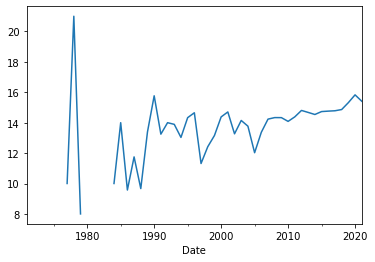

In [97]:
# Another visual
max_grades = df_sport.max_month
annual_max_grades = max_grades.resample('A').mean()
annual_max_grades.plot();

### Average grades over time

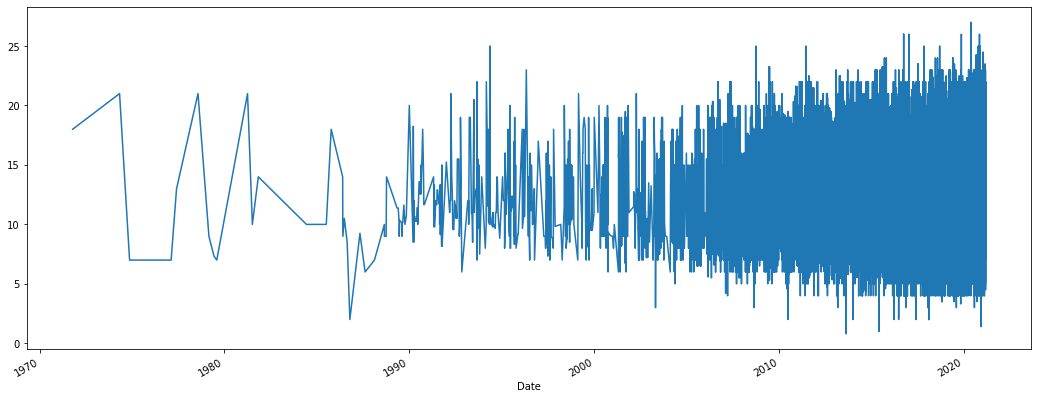

In [96]:
# plot average grades over time
df_sport.avg_month.plot(figsize=(18,7));

These make sense. As more users joined, there's more users with lower averages and maxes and more users with higher averages and maxes.

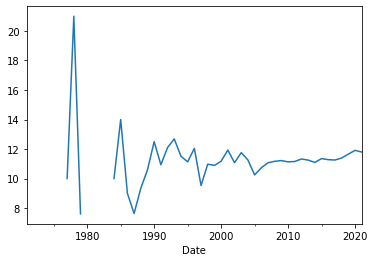

In [103]:
# Another way of looking at it. Average stabilizes to 12 (5.10c) as more users join.
avg_grades = df_sport.avg_month
annual_avg_grades = avg_grades.resample('A').mean()
annual_avg_grades.plot();

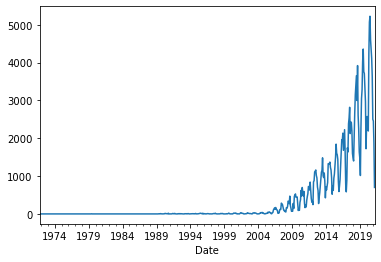

In [104]:
# Count of ticks by month. Clearly there's a seasonal trend
avg_grades = df_sport.avg_month
annual_avg_grades = avg_grades.resample('M').count()
annual_avg_grades.plot();

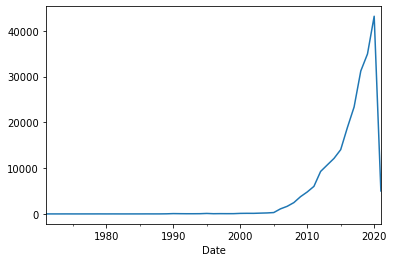

In [105]:
# Count of ticks by year. Clearly there's a seasonal trend
avg_grades = df_sport.avg_month
annual_avg_grades = avg_grades.resample('Y').count()
annual_avg_grades.plot();

## Make graphs for some individual users

In [94]:
df_sport.Name.value_counts().head(50)

rob bauer             2228
Ken Noyce             1622
Derek Young           1444
Julius Beres          1374
Sarah Meiser          1320
Cara Hubbell          1298
C Hopwood             1192
Brian Stevens         1116
Brian in SLC          1100
Jason Albino          1068
Ralph Swansen          877
Dwight Jugornot        861
Spencer B              854
Todd Moy               829
Bob R.                 758
Yaroslav Lototskyy     744
Liet Keynes            718
Tryhard Scoville       713
Dean Cool              708
Nolan Ingersoll        699
tim                    689
Spencer Drewelow       686
Eric Danner            672
Ryan O                 663
b hof                  662
Casey Jensen           659
Julian Barnett         639
WAGbag                 639
Sev S                  614
Nathaniel Chu          596
Ivan Sokol             593
KipHenrie              589
Curt Chesney           588
David Earle            583
Carl Schaefer          580
Sean Coyle             578
Tombo                  565
S

### Dwight

#### Max grade per month

In [59]:
df_dwight = df_sport[df_sport['Name'] == 'Dwight Jugornot']

In [60]:
df_dwight[df_dwight['max_month'] > 20].head(5)

,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,numerical_difficulty,max_month,avg_month,sport_ticks_this_month
Date,,,,,,,,,,,,,
2019-09-12,Dwight Jugornot,9,2019-09,Male,60.0,5.10,Lead,NaN,1.0,11.5,21.0,13.3,20
2019-09-12,Dwight Jugornot,9,2019-09,Male,60.0,5.12d,Lead,NaN,1.0,21.0,21.0,13.3,20
2019-09-02,Dwight Jugornot,9,2019-09,Male,60.0,5.12a,Lead,NaN,1.0,18.0,21.0,13.3,20
2019-09-02,Dwight Jugornot,9,2019-09,Male,60.0,5.11a,Lead,NaN,1.0,14.0,21.0,13.3,20
2019-09-02,Dwight Jugornot,9,2019-09,Male,60.0,5.11a,Lead,NaN,1.0,14.0,21.0,13.3,20


In [61]:
df_dwight = df_dwight.drop_duplicates(subset=['month_year'])

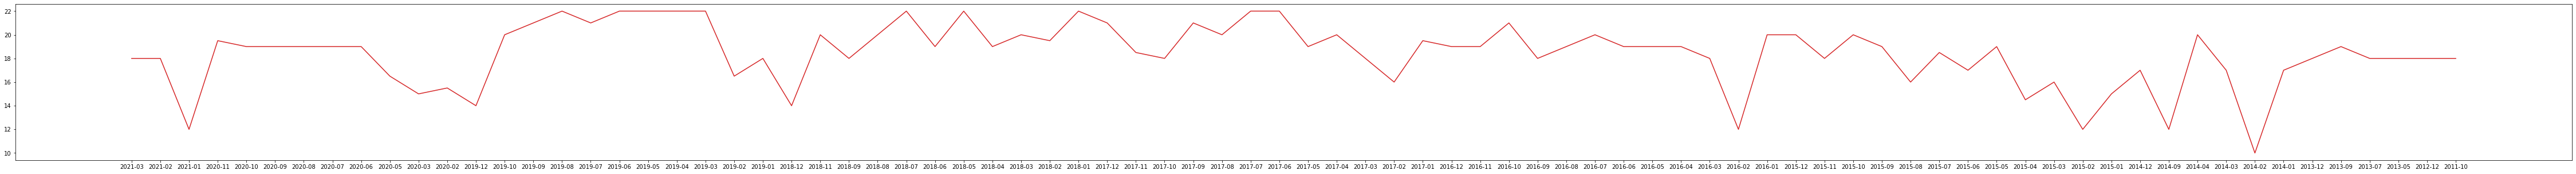

In [62]:
x = df_dwight['month_year']
y = df_dwight['max_month']

plt.figure(figsize=(80,5))
plt.plot(x,y, color='tab:red')
plt.show()

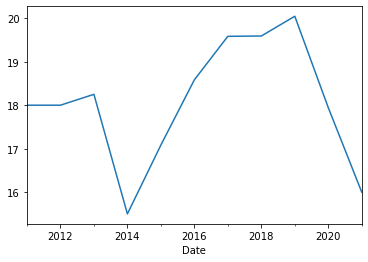

In [63]:
# Yearly
annual_avg = y.resample('A').mean()
annual_avg.plot();

#### Average grade per month

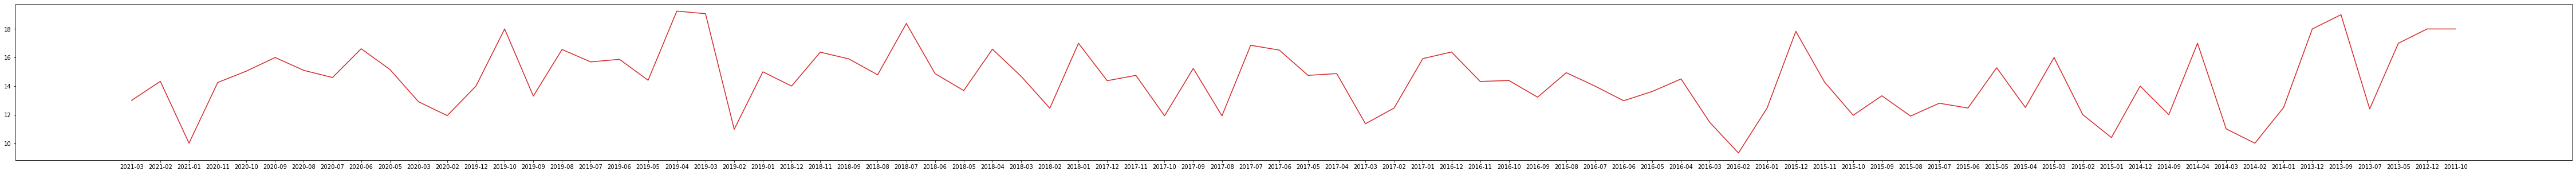

In [64]:
# Monthly
x = df_dwight['month_year']
y = df_dwight['avg_month']

plt.figure(figsize=(80,5))
plt.plot(x,y, color='tab:red')
plt.show()

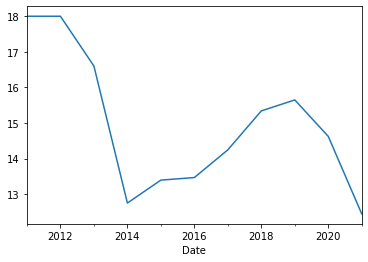

In [65]:
# Yearly
annual_avg = y.resample('A').mean()
annual_avg.plot();

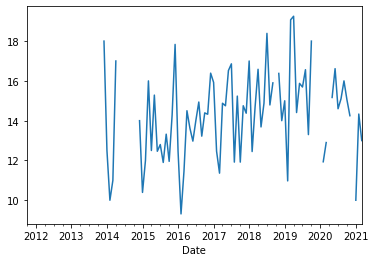

In [66]:
# Monthly
monthly_avg = y.resample('M').mean()
monthly_avg.plot();

#### Max lead send per month

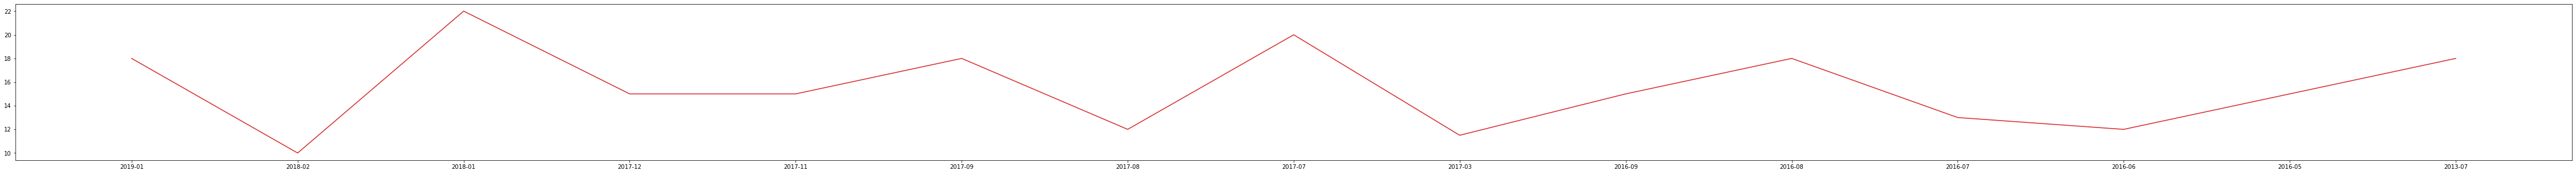

In [67]:
# Monthly
df_send_dwight = df_sport_lead_send[df_sport_lead_send['Name'] == 'Dwight Jugornot']

df_send_dwight = df_send_dwight.drop_duplicates(subset=['month_year'])

x = df_send_dwight['month_year']
y = df_send_dwight['max_lead_send_month']

plt.figure(figsize=(80,5))
plt.plot(x,y, color='tab:red')
plt.show()

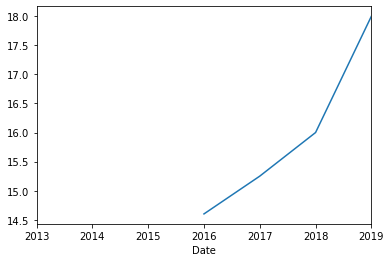

In [68]:
# Yearly
annual_avg = y.resample('A').mean()
annual_avg.plot();

#### Autocorrelation

In [69]:
dwight_avg_grades = df_dwight['avg_month']
dwight_avg_grades

Date
2021-03-09    13.000000
2021-02-23    14.333333
2021-01-30    10.000000
2020-11-18    14.250000
2020-10-29    15.050000
                ...    
2013-09-09    19.000000
2013-07-18    12.400000
2013-05-20    17.000000
2012-12-03    18.000000
2011-10-28    18.000000
Name: avg_month, Length: 82, dtype: float64

In [70]:
# check autocorrelation for previous 24 months
for i in range(1,25):
    print(i, dwight_avg_grades.autocorr(lag=i))

1 0.16331223182460677
2 -0.034321391067090395
3 -0.0026521174825460247
4 0.1676454095426143
5 0.18180430941629167
6 -0.02686640015221775
7 0.16334076197769393
8 0.004699452049584764
9 0.08879986568116409
10 -0.02075047350619888
11 0.04574758754004654
12 0.15447302589086445
13 0.07198828627665142
14 0.13065648015660186
15 -0.04399866649905586
16 -0.25080118552413083
17 -0.11634296037427605
18 0.09293946499336844
19 0.092691519872937
20 -0.037845128278119256
21 -0.004304995286133529
22 0.039903735322438696
23 -0.17468401837970735
24 -0.22855407538562633


### Noyce

#### Max grade per month

In [71]:
df_noyce = df_sport[df_sport['Name'] == 'Ken Noyce']

In [72]:
df_noyce = df_noyce.drop_duplicates(subset=['month_year'])

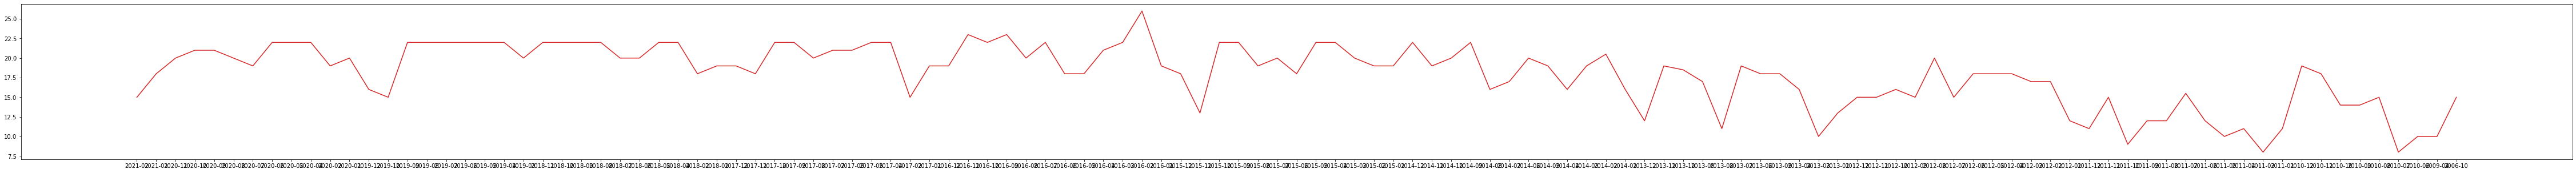

In [73]:
x = df_noyce['month_year']
y = df_noyce['max_month']

plt.figure(figsize=(80,5))
plt.plot(x,y, color='tab:red')
plt.show()

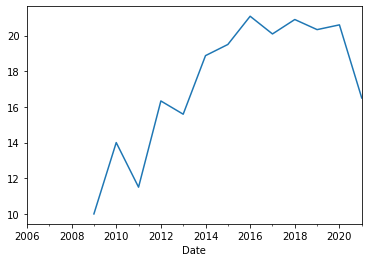

In [74]:
# Yearly
annual_avg = y.resample('A').mean()
annual_avg.plot();

#### Average grade per month

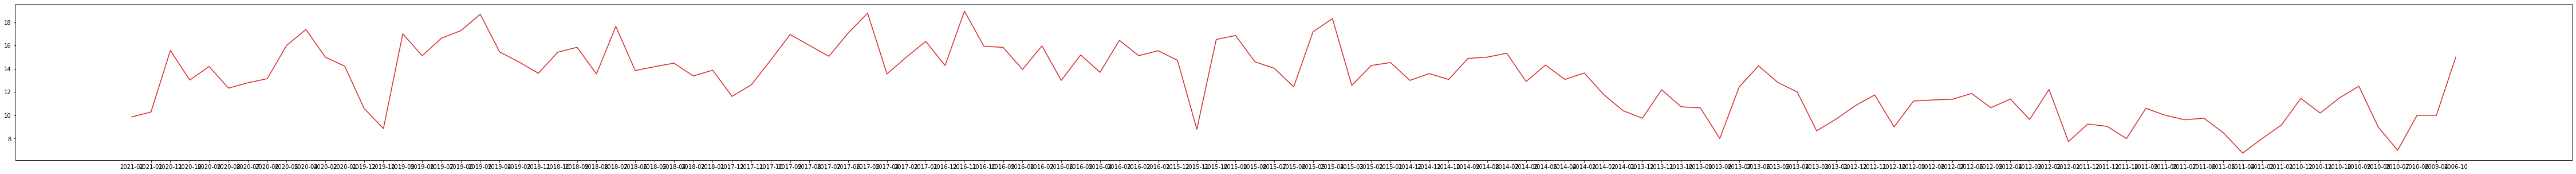

In [75]:
x = df_noyce['month_year']
y = df_noyce['avg_month']

plt.figure(figsize=(80,5))
plt.plot(x,y, color='tab:red')
plt.show()

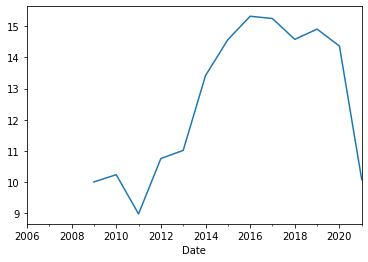

In [76]:
# Yearly
annual_avg = y.resample('A').mean()
annual_avg.plot();

#### Max lead send per month

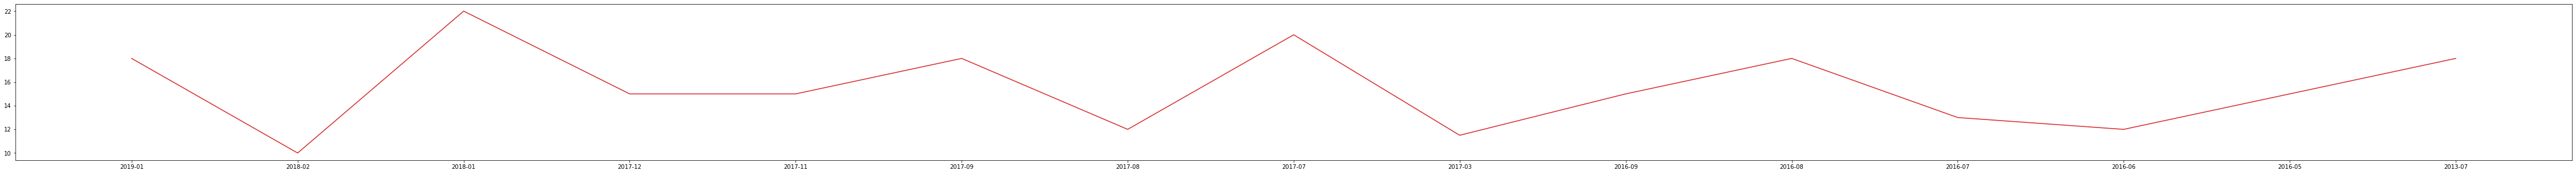

In [77]:
df_send_noyce = df_sport_lead_send[df_sport_lead_send['Name'] == 'Ken Noyce']

df_send_noyce = df_send_dwight.drop_duplicates(subset=['month_year'])

x = df_send_noyce['month_year']
y = df_send_noyce['max_lead_send_month']

plt.figure(figsize=(80,5))
plt.plot(x,y, color='tab:red')
plt.show()

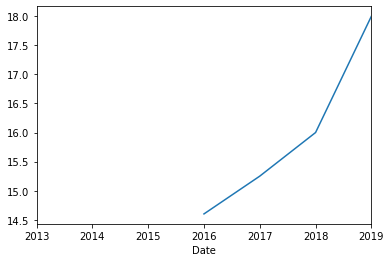

In [78]:
# Yearly
annual_avg = y.resample('A').mean()
annual_avg.plot();

#### Autocorrelation

In [79]:
noyce_avg_grades = df_noyce['avg_month']
noyce_avg_grades

Date
2021-02-15     9.857143
2021-01-18    10.285714
2020-11-07    15.571429
2020-10-31    13.032258
2020-09-16    14.190476
                ...    
2010-08-28     8.985714
2010-07-26     7.000000
2010-06-26    10.000000
2009-04-23    10.000000
2006-10-05    15.000000
Name: avg_month, Length: 121, dtype: float64

In [80]:
# check autocorrelation for previous 24 months
for i in range(1,25):
    print(i, noyce_avg_grades.autocorr(lag=i))

1 0.6435091522884108
2 0.5444827648073188
3 0.49040964738066417
4 0.48673954053700924
5 0.551353836510921
6 0.5195095448048038
7 0.5153863097835485
8 0.5556763702275502
9 0.5584235690335486
10 0.4910562606006477
11 0.4634286233935554
12 0.4143942503834794
13 0.478691694383571
14 0.42491220798569296
15 0.43164240613311805
16 0.4282213052825148
17 0.3427685597020552
18 0.43841980284869647
19 0.4837230766378329
20 0.40146116405123716
21 0.3868951007386509
22 0.37072150921666164
23 0.403187684837503
24 0.39225884626760105


### Todd Moy

#### Max grade per month

In [81]:
df_moy = df_sport[df_sport['Name'] == 'Todd Moy']

In [82]:
df_moy = df_moy.drop_duplicates(subset=['month_year'])

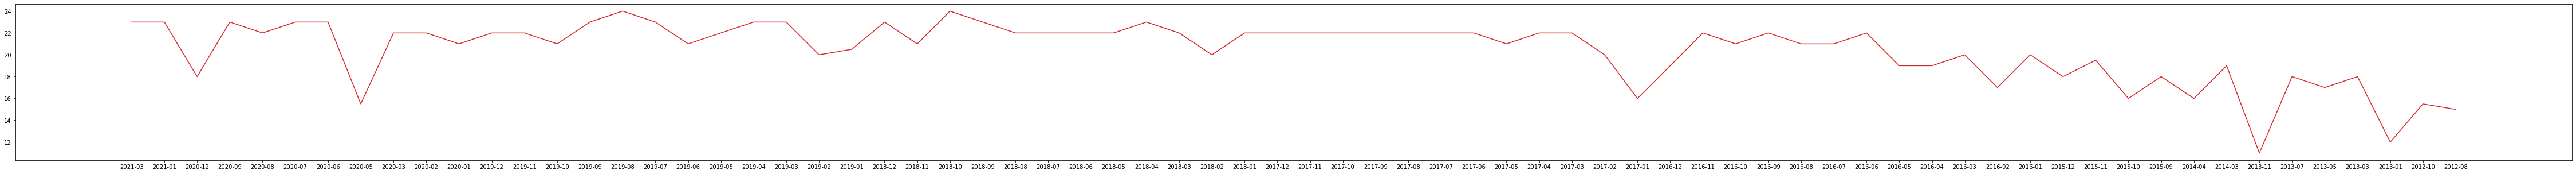

In [83]:
x = df_moy['month_year']
y = df_moy['max_month']

plt.figure(figsize=(80,5))
plt.plot(x,y, color='tab:red')
plt.show()

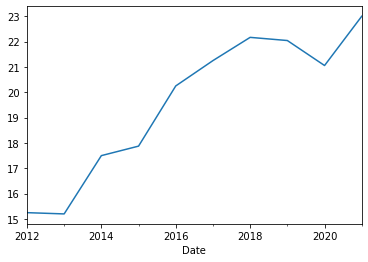

In [84]:
# Yearly
annual_avg = y.resample('A').mean()
annual_avg.plot();

#### Average grade per month

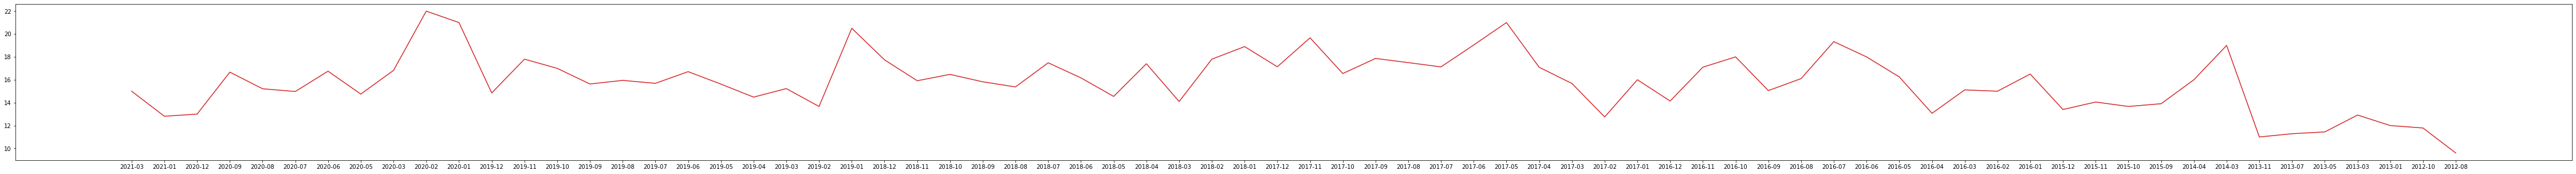

In [85]:
x = df_moy['month_year']
y = df_moy['avg_month']

plt.figure(figsize=(80,5))
plt.plot(x,y, color='tab:red')
plt.show()

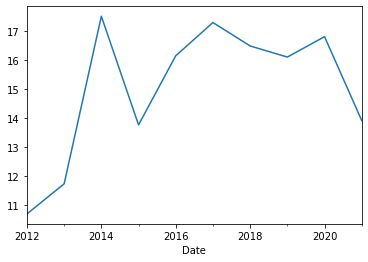

In [86]:
# Yearly
annual_avg = y.resample('A').mean()
annual_avg.plot();

#### Max lead send per month

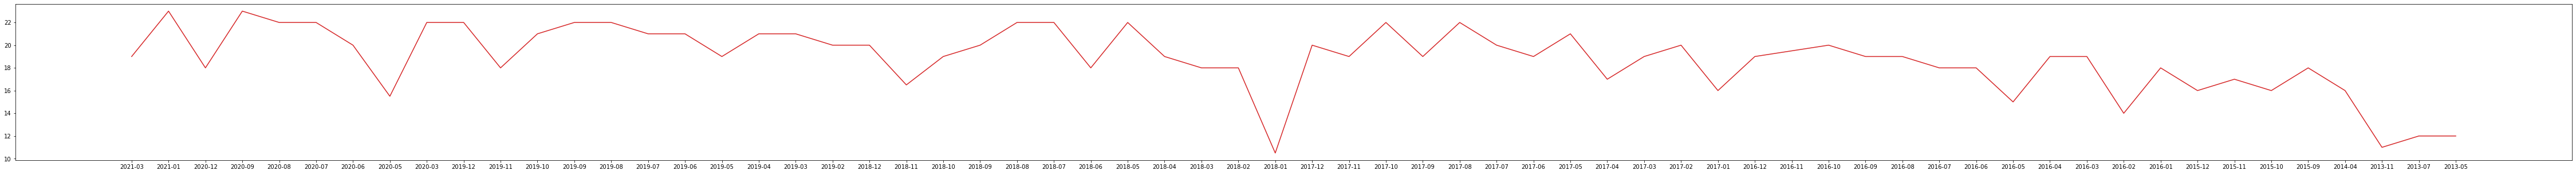

In [87]:
df_send_moy = df_sport_lead_send[df_sport_lead_send['Name'] == 'Todd Moy']

df_send_moy = df_send_moy.drop_duplicates(subset=['month_year'])

x = df_send_moy['month_year']
y = df_send_moy['max_lead_send_month']

plt.figure(figsize=(80,5))
plt.plot(x,y, color='tab:red')
plt.show()

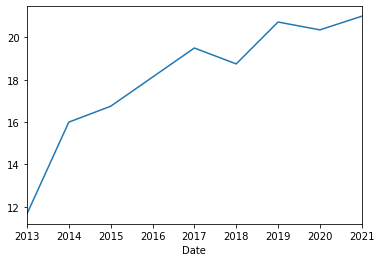

In [88]:
# Yearly
annual_avg = y.resample('A').mean()
annual_avg.plot();

### Nathaniel Chu

#### Max grade per month

In [89]:
df_chu = df_sport[df_sport['Name'] == 'Nathaniel Chu']

In [90]:
df_chu = df_chu.drop_duplicates(subset=['month_year'])

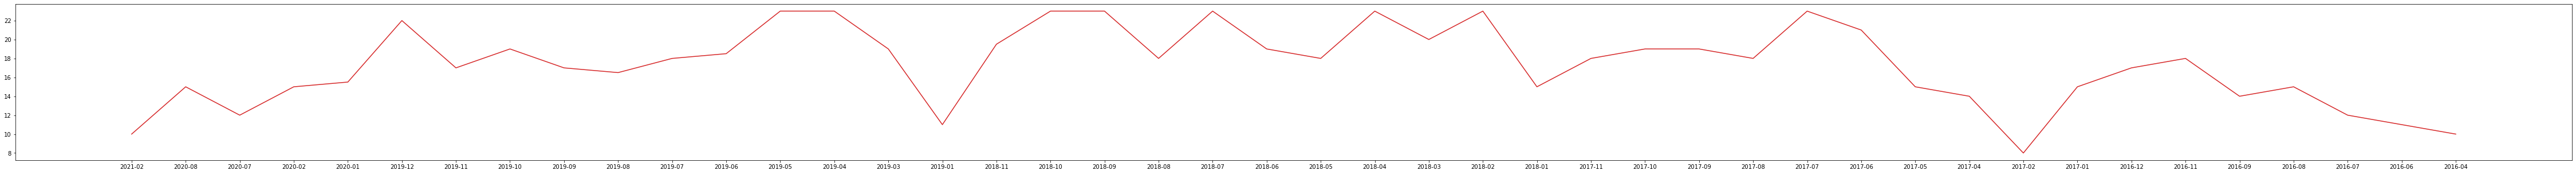

In [91]:
x = df_chu['month_year']
y = df_chu['max_month']

plt.figure(figsize=(80,5))
plt.plot(x,y, color='tab:red')
plt.show()

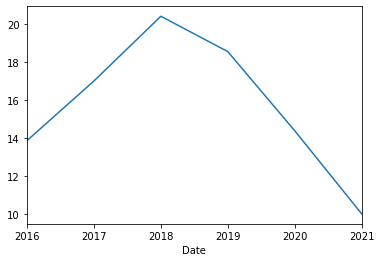

In [92]:
# Yearly
annual_avg = y.resample('A').mean()
annual_avg.plot();

#### Average grade per month

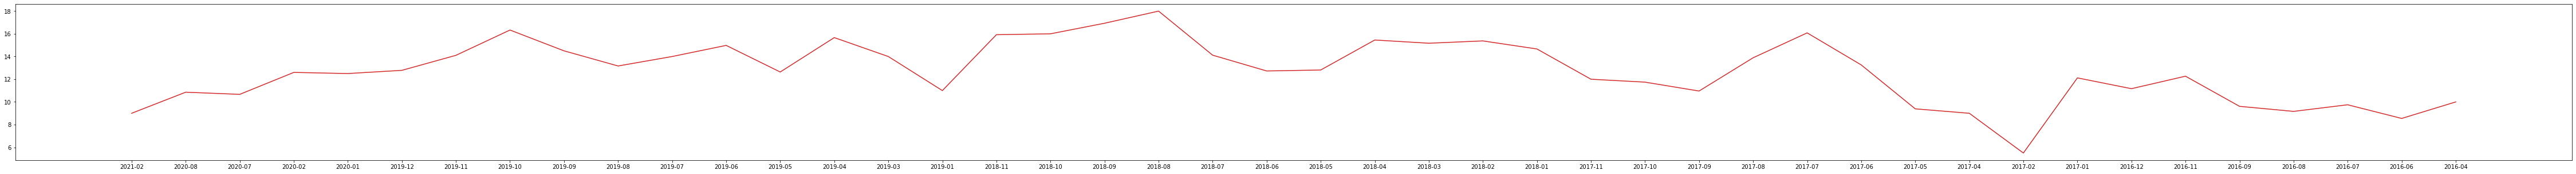

In [93]:
x = df_chu['month_year']
y = df_chu['avg_month']

plt.figure(figsize=(80,5))
plt.plot(x,y, color='tab:red')
plt.show()

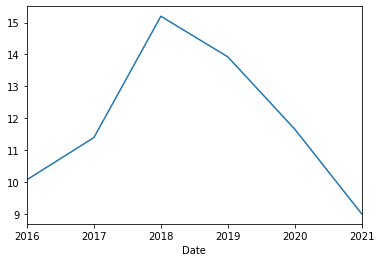

In [94]:
# Yearly
annual_avg = y.resample('A').mean()
annual_avg.plot();

#### Max lead send per month

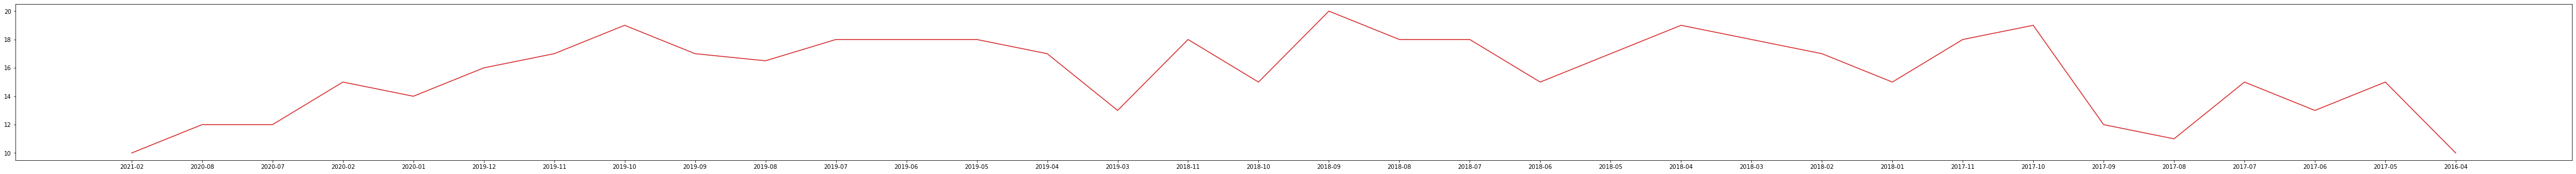

In [95]:
df_send_chu = df_sport_lead_send[df_sport_lead_send['Name'] == 'Nathaniel Chu']

df_send_chu = df_send_chu.drop_duplicates(subset=['month_year'])

x = df_send_chu['month_year']
y = df_send_chu['max_lead_send_month']

plt.figure(figsize=(80,5))
plt.plot(x,y, color='tab:red')
plt.show()

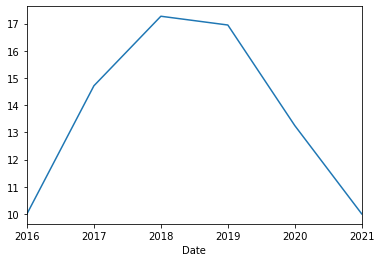

In [96]:
# Yearly
annual_avg = y.resample('A').mean()
annual_avg.plot();

### Alissa Doherty

#### Max grade per month

In [97]:
df_doherty = df_sport[df_sport['Name'] == 'Alissa Doherty']

In [98]:
df_doherty = df_doherty.drop_duplicates(subset=['month_year'])

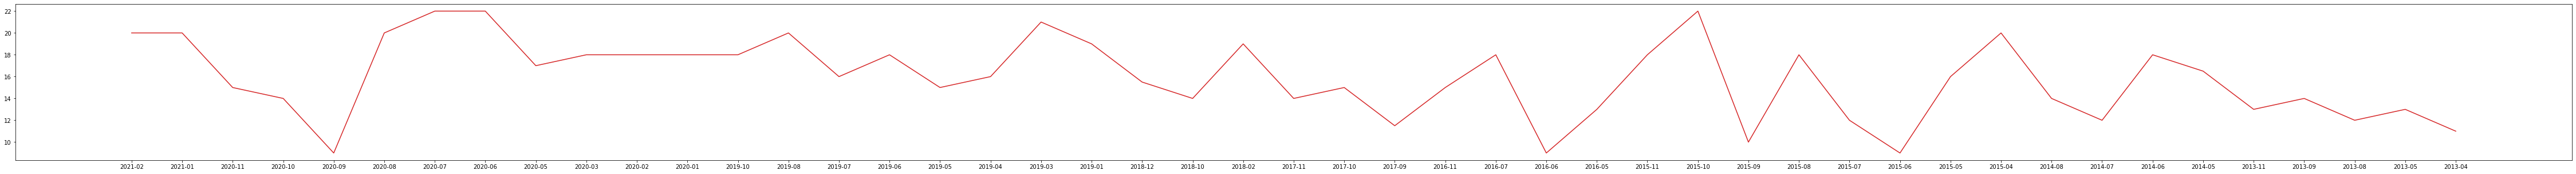

In [99]:
x = df_doherty['month_year']
y = df_doherty['max_month']

plt.figure(figsize=(80,5))
plt.plot(x,y, color='tab:red')
plt.show()

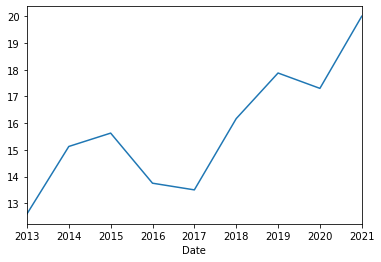

In [100]:
# Yearly
annual_avg = y.resample('A').mean()
annual_avg.plot();

#### Average grade per month

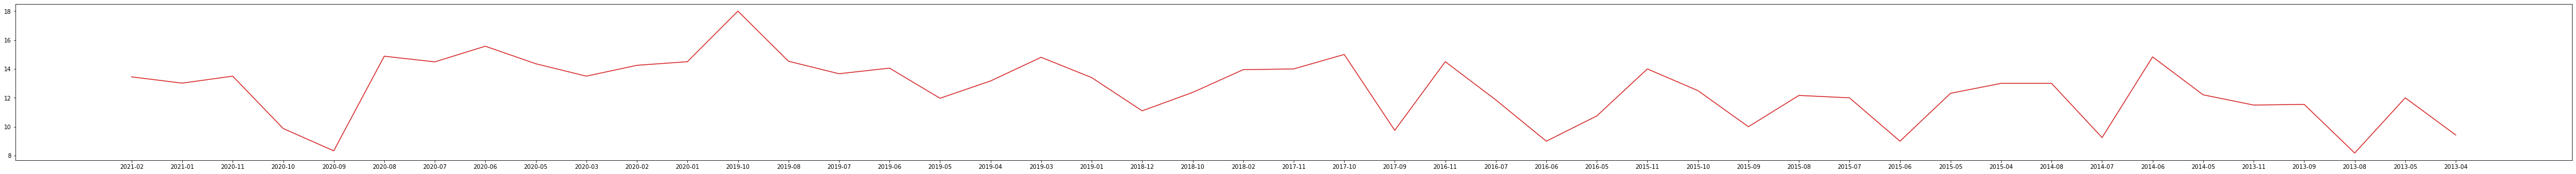

In [101]:
x = df_doherty['month_year']
y = df_doherty['avg_month']

plt.figure(figsize=(80,5))
plt.plot(x,y, color='tab:red')
plt.show()

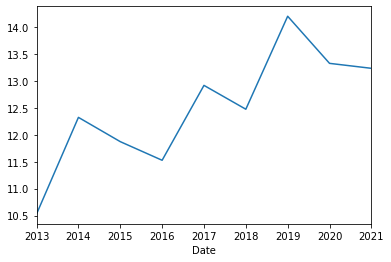

In [102]:
# Yearly
annual_avg = y.resample('A').mean()
annual_avg.plot();

#### Max lead send per month

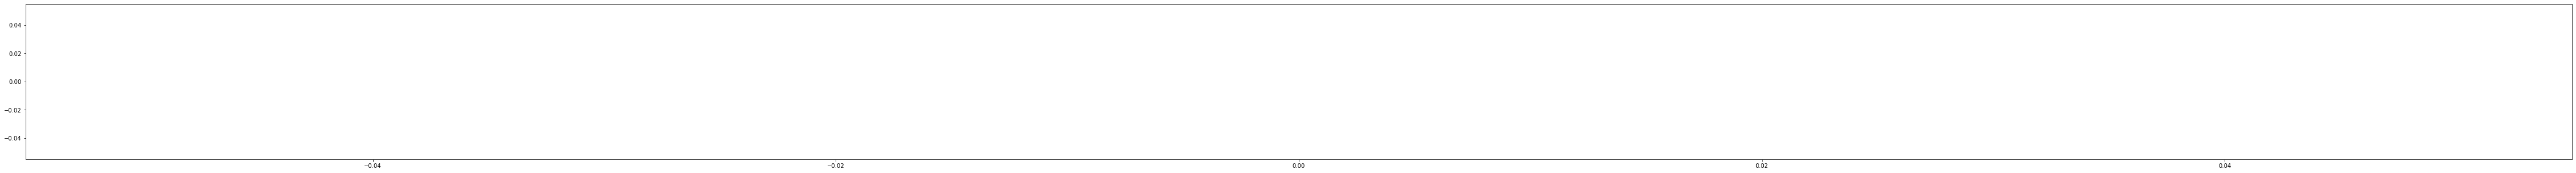

In [103]:
df_send_doherty = df_sport_lead_send[df_sport_lead_send['Name'] == 'Alissa Doherty']

df_send_doherty = df_send_doherty.drop_duplicates(subset=['month_year'])

x = df_send_doherty['month_year']
y = df_send_doherty['max_lead_send_month']

plt.figure(figsize=(80,5))
plt.plot(x,y, color='tab:red')
plt.show()

Upon further insection, Doherty doesn't list the way or style she climbed any of her routes.

## Autocorrelations

### Monthly

In [104]:
names = df_sport.Name.unique()

In [105]:
# Make a list of lists of autocorrelations for each month
lst = [[],[],[],[],[],[],[],[],[],[],[],[]]

for name in names:
    df_user = df_sport[df_sport['Name'] == name]
    user_avg_grades = df_user['avg_month']
    
    # check autocorrelation for previous 12 months
    for i in range(1,13):
        lst[i-1].append(user_avg_grades.autocorr(lag=i))

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [106]:
# Print the average autocorrelation for each month
nump = np.array(lst)
count = 1
for element in nump:
    element_nump = np.array(element)
    no_nans = element_nump[~np.isnan(element_nump)]
    print(count, ": ", np.mean(no_nans, axis=0))
    count += 1

1 :  0.5571872788792902
2 :  0.3893312482505868
3 :  0.28668149810744165
4 :  0.21869720346266688
5 :  0.17314147153912315
6 :  0.14703347336320854
7 :  0.12248650482507055
8 :  0.11591464337507026
9 :  0.09966474402914358
10 :  0.10037331189790864
11 :  0.08978907776614987
12 :  0.09096151889104745


It looks like there are correlations with previous months. The further away the month, the smaller the correlation.

## Dickey-Fuller Test

In [107]:
# define Dickey-Fuller Test (DFT) function
def dftest(timeseries):
    dftest = ts.adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    print(dfoutput[0])
    print(dfoutput[1])
    print(dfoutput[4])
    #Determine rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

Test Statistic         -7.419158e+00
p-value                 6.808569e-11
Lags Used               0.000000e+00
Observations Used       8.100000e+01
Critical Value (1%)    -3.513790e+00
Critical Value (5%)    -2.897943e+00
Critical Value (10%)   -2.586191e+00
dtype: float64
-7.419157743819236
6.808568761244005e-11
-3.5137900174243235


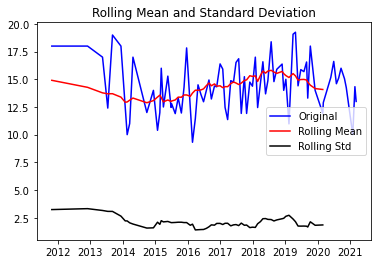

In [108]:
# On just Dwight
dftest(df_dwight.avg_month)

In [126]:
def dickey_fuller(dataframe, column):    
    names = dataframe['Name'].unique()
    pvalues = []
    critical_vals_one_perc = []
    critical_vals_five_perc = []
    test_statistics = []
    lags = []
    observations = []
    for name in names:
        try: 
            df_user = dataframe[dataframe['Name'] == name]
            user_avg_grades = df_user[column]
    
            dftest = ts.adfuller(user_avg_grades, autolag='AIC')
            dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Observations Used'])
            for key,value in dftest[4].items():
                dfoutput['Critical Value (%s)'%key] = value
            pvalues.append(dfoutput['p-value'])
            critical_vals_one_perc.append(dfoutput[4])
            critical_vals_five_perc.append(dfoutput[5])
            if dfoutput['Test Statistic'] == -np.inf:
                dfoutput['Test Statistic'] = 10**-10
            test_statistics.append(dfoutput['Test Statistic'])
            lags.append(dfoutput['Lags Used'])
            observations.append(dfoutput['Observations Used'])
        except:
            pass
        
    mean_pval = pvalues
    mean_pval = np.array(mean_pval) # turn into np array
    mean_pval = mean_pval[~np.isnan(mean_pval)] # remove nan values
    mean_pval = np.mean(mean_pval, axis=0) # find mean of np array
    print('Average pvalue: ', mean_pval)

    mean_crit_val_one = critical_vals_one_perc
    mean_crit_val_one = np.array(mean_crit_val_one) # turn into np array
    mean_crit_val_one = mean_crit_val_one[~np.isnan(mean_crit_val_one)] # remove nan values
    mean_crit_val_one = np.mean(mean_crit_val_one, axis=0) # find mean of np array
    print('Average critical mean value 1%: ', mean_crit_val_one)

    mean_crit_val_five = critical_vals_five_perc
    mean_crit_val_five = np.array(mean_crit_val_five) # turn into np array
    mean_crit_val_five = mean_crit_val_five[~np.isnan(mean_crit_val_five)] # remove nan values
    mean_crit_val_five = np.mean(mean_crit_val_five, axis=0) # find mean of np array
    print('Average critical mean value 5%: ', mean_crit_val_five)

    mean_test_stat = test_statistics
    mean_test_stat = np.array(mean_test_stat) # turn into np array
    mean_test_stat = mean_test_stat[~np.isnan(mean_test_stat)] # remove nan values
    #mean_test_stat = mean_test_stat[~np.isinf(mean_test_stat)] # remove inf values
    mean_test_stat = np.mean(mean_test_stat, axis=0) # find mean of np array
    print('Average Test Statistic: ', mean_test_stat)

    mean_lags = lags
    mean_lags = np.array(mean_lags) # turn into np array
    mean_lags = mean_lags[~np.isnan(mean_lags)] # remove nan values
    mean_lags = mean_lags[~np.isinf(mean_lags)] # remove inf values
    mean_lags = np.mean(mean_lags, axis=0) # find mean of np array
    print('Average Lags: ', mean_lags)
    
    mean_test_observations = observations
    mean_test_observations = np.array(mean_test_observations) # turn into np array
    mean_test_observations = mean_test_observations[~np.isnan(mean_test_observations)] # remove nan values
    mean_test_observations = mean_test_observations[~np.isinf(mean_test_observations)] # remove inf values
    mean_test_observations = np.mean(mean_test_observations, axis=0) # find mean of np array
    print('Average Observations Used: ', mean_test_observations)
    

In [127]:
# Statistics using Dickey-Fuller test to see if using average route difficulty 
# per month would be stationary.
dickey_fuller(df_sport, 'avg_month')

Average pvalue:  0.283039967325857
Average critical mean value 1%:  -4.3375469887420275
Average critical mean value 5%:  -3.2369694658250303
Average Test Statistic:  -15783438818571.043
Average Lags:  2.0261348005502064
Average Observations Used:  73.72352132049518


In [111]:
# Statistics using Dickey-Fuller test to see if using max route difficulty 
# per month would be stationary.
dickey_fuller(df_sport, 'max_month')

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarn

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarn

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarn

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarn

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarn

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarn

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarn

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarn

Average pvalue:  0.2954271821967707
Average critical mean value 1%:  -4.326461408051561
Average critical mean value 5%:  -3.232483673649812
Average Test Statistic:  -26508769859697.3
Average Lags:  1.7603163686382393
Average Observations Used:  73.98933975240715


In [112]:
# Statistics using Dickey-Fuller test to see if using average route difficulty 
# per month would be stationary.
dickey_fuller(df_sport_lead_send, 'max_month')

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarn

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarn

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarn

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarn

Average pvalue:  0.3254137802874531
Average critical mean value 1%:  -4.799672745954789
Average critical mean value 5%:  -3.4285729851940925
Average Test Statistic:  -19990158793783.418
Average Lags:  1.7529904306220097
Average Observations Used:  41.09090909090909


The null hypothesis in the Dickey-Fuller test is that the time series is non-stationary and has time-dependent structure. 

A p-value > .05 means that we have failed to reject the null hypothesis, so the data has a unit root and is non-stationary.

If test statistic is less than critical values, reject the null hypothesis - data is stationary.

My p-values are all greater than .05 -> my data is non-stationary.
My mean test statistics are all less than the critical value -> my data is stationary.

I have contradictory results.

## KPSS

In [113]:
def kpss_test(timeseries):
    print('Results of KPSS test:')
    kpsstest = kpss(timeseries,regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index = ['Test Statistic,', 'p-value',
                                                   'Lags Used'])
    for key, value in kpsstest[3].items():
        kpss_output['Critical Value(%s)'%key] = value
    print(kpss_output)

In [128]:
# On just Dwight
kpss_test(df_dwight.avg_month)

Results of KPSS test:
Test Statistic,          0.195328
p-value                  0.100000
Lags Used               12.000000
Critical Value(10%)      0.347000
Critical Value(5%)       0.463000
Critical Value(2.5%)     0.574000
Critical Value(1%)       0.739000
dtype: float64


In [118]:
def kpss_t(dataframe, column):
# KPSS Test with max grade per month
    names = dataframe['Name'].unique()
    pvalues = []
    critical_vals_one_perc = []
    critical_vals_five_perc = []
    test_statistics = []
    critical_vals_ten_perc = []
    lags = []
    for name in names:
        #try: 
            df_user = dataframe[dataframe['Name'] == name]
            user_avg_grades = df_user[column]
            user_avg_grades.index = pd.to_datetime(user_avg_grades.index)
        
            kpsstest = kpss(user_avg_grades, 'ct') # ct = test around a deterministic trend (rather than mean only)
            kpss_output = pd.Series(kpsstest[0:3], index = ['Test Statistic', 'p-value',
                                                           'Lags Used'])
            for key, value in kpsstest[3].items():
                kpss_output['Critical Value(%s)'%key] = value
        
            pvalues.append(kpss_output['p-value'])
            critical_vals_one_perc.append(kpss_output[6])
            critical_vals_ten_perc.append(kpss_output[3])
            critical_vals_five_perc.append(kpss_output[4])
            test_statistics.append(kpss_output['Test Statistic'])
            lags.append(kpss_output['Lags Used'])
        #except:
            #pass
        
    mean_pval = pvalues
    mean_pval = np.array(mean_pval) # turn into np array
    mean_pval = mean_pval[~np.isnan(mean_pval)] # remove nan values
    mean_pval = np.mean(mean_pval, axis=0) # find mean of np array
    print('Mean pvalue: ', mean_pval)

    mean_crit_val_one = critical_vals_one_perc
    mean_crit_val_one = np.array(mean_crit_val_one) # turn into np array
    mean_crit_val_one = mean_crit_val_one[~np.isnan(mean_crit_val_one)] # remove nan values
    mean_crit_val_one = np.mean(mean_crit_val_one, axis=0) # find mean of np array
    print('Mean critical mean value 1%: ', mean_crit_val_one)

    mean_crit_val_five = critical_vals_five_perc
    mean_crit_val_five = np.array(mean_crit_val_five) # turn into np array
    mean_crit_val_five = mean_crit_val_five[~np.isnan(mean_crit_val_five)] # remove nan values
    mean_crit_val_five = np.mean(mean_crit_val_five, axis=0) # find mean of np array
    print('Mean critical mean value 5%: ', mean_crit_val_five)

    mean_crit_val_ten = critical_vals_ten_perc
    mean_crit_val_ten = np.array(mean_crit_val_ten) # turn into np array
    mean_crit_val_ten = mean_crit_val_ten[~np.isnan(mean_crit_val_ten)] # remove nan values
    mean_crit_val_ten = np.mean(mean_crit_val_ten, axis=0) # find mean of np array
    print('Mean critical mean value 10%: ', mean_crit_val_ten)

    mean_test_stat = test_statistics
    mean_test_stat = np.array(mean_test_stat) # turn into np array
    mean_test_stat = mean_test_stat[~np.isnan(mean_test_stat)] # remove nan values
    mean_test_stat = np.mean(mean_test_stat, axis=0) # find mean of np array
    print('Mean Test Statistic: ', mean_test_stat)

    mean_lags = lags
    mean_lags = np.array(mean_lags) # turn into np array
    mean_lags = mean_lags[~np.isnan(mean_lags)] # remove nan values
    mean_lags = np.mean(mean_lags, axis=0) # find mean of np array
    print('Mean Lags: ', mean_lags)

In [116]:
df_sport['Name']

Date
2020-12-19    Aidan Shelburne
2020-08-06    Aidan Shelburne
2020-08-06    Aidan Shelburne
2020-08-06    Aidan Shelburne
2020-08-06    Aidan Shelburne
                   ...       
2014-05-03     Tracey Pomeroy
2014-05-03     Tracey Pomeroy
2014-05-03     Tracey Pomeroy
2014-05-03     Tracey Pomeroy
2014-05-03     Tracey Pomeroy
Name: Name, Length: 224163, dtype: object

In [123]:
kpss_t(df_sport, 'max_month')

Mean pvalue:  0.043638374549460325
Mean critical mean value 1%:  0.21600000000000008
Mean critical mean value 5%:  0.14599999999999996
Mean critical mean value 10%:  0.11900000000000001
Mean Test Statistic:  0.2800257136627043
Mean Lags:  8.484945922244957


In [121]:
kpss_t(df_sport, 'avg_month')

Mean pvalue:  0.045225479589406384
Mean critical mean value 1%:  0.21600000000000008
Mean critical mean value 5%:  0.14599999999999996
Mean critical mean value 10%:  0.11900000000000001
Mean Test Statistic:  0.27516736953722776
Mean Lags:  8.484945922244957


Average grade, ct:
* Mean pvalue:  0.045225479589406384
* Mean critical mean value 1%:  0.21600000000000008
* Mean critical mean value 5%:  0.14599999999999996
* Mean critical mean value 10%:  0.11900000000000001
* Mean Test Statistic:  0.27516736953722776
* Mean Lags:  8.484945922244957

In [122]:
kpss_t(df_sport_lead_send, 'max_month')

Mean pvalue:  0.03685831085886045
Mean critical mean value 1%:  0.216
Mean critical mean value 5%:  0.146
Mean critical mean value 10%:  0.119
Mean Test Statistic:  0.3237796176823488
Mean Lags:  6.694984184365115


Test statistic is greater than critical value. Reject the null hypothesis. Series is not stationary.

If p_value < .05, data is not stationary.

This means that my data isn't stationary, even if you exclude a trend.

If there isn't a trend, the fact that it's not stationary may be due to a random walk or cycles.

Upon further investigation, my data is highly irregular. The Dickey-Fuller and KPSS tests are for determining if I can use ARIMA, but I can't use ARIMA anyway because there's no reliable way of making my data regularly spaced. I'll be pivoting to treat this problem as a regression problem. Also, since max grade, max lead send grade, and max average seem similar in terms of seasonality and trend (just based on the graphs I did of specific climbers), I'm going to use max grade as my target since it doesn't force me to remove any data and since it would be the most valuable statistic to climbers.